<a href="https://colab.research.google.com/github/changsin/TDD/blob/main/tdd_python/notebooks/SOLID_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import glob
import os

def glob_files(folder, file_type='*'):
    search_string = os.path.join(folder, file_type)
    files = glob.glob(search_string)

    print('Searching ', search_string)
    paths = []
    for f in files:
      if os.path.isdir(f):
        sub_paths = glob_files(f + '/')
        paths += sub_paths
      else:
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

def glob_folders(folder, file_type='*'):
    search_string = os.path.join(folder, file_type)
    files = glob.glob(search_string)

    print('Searching ', search_string)
    paths = []
    for f in files:
      if os.path.isdir(f):
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

In [28]:
# DATA_ROOT = 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\3\\BMW\\'
DATA_ROOT = 'D:\\Sidewalk\\Sidewalk_19009_output_zip\\Sidewalk_19009_output_zip_box\\Sidewalk_19009_output_zip_box_000001_1\\'

In [29]:
from lxml import etree

def parse_xml(filename):
    image_labels = []

    tree = etree.parse(filename)
    for image in tree.xpath('image'):
        # print(image.attrib['name'])
        name = image.attrib['name']
        width = int(image.attrib['width'])
        height = int(image.attrib['height'])

        boxes = []

        for box in image.xpath('box'):
            xtl = float(box.attrib['xtl'])
            ytl = float(box.attrib['ytl'])
            xbr = float(box.attrib['xbr'])
            ybr = float(box.attrib['ybr'])

            label = box.attrib['label']
            # wtype = box.xpath('attribute[@name="name"]')[0].text
            # daynight = box.xpath('attribute[@name="daynight"]')[0].text
            # visibility = int(box.xpath('attribute[@name="visibility"]')[0].text)

            # box = wtype, alertwarning, daynight, visibility, xtl, ytl, xbr, ybr
            box = label, xtl, ytl, xbr, ybr

            boxes.append(box)

        image_labels.append([name, width, height, np.array(boxes)])

    return np.array(image_labels)


In [124]:
def load_labels(path, file_type='*'):
    files = []
    folders = glob_folders(path, file_type='*')
    if folders:
        for folder in folders:
            files.extend(glob_files(folder, file_type=file_type))
    # print(files)
    else:
        files = glob_files(path, file_type=file_type)

    y = []
    dfy = []

    for file in files:
        print(f"Parsing {file}")
        labels = parse_xml(file)
        y.append([os.path.basename(file), labels])
        for label in labels:
            filename = label[0]
            width = label[1]
            height = label[2]
            boxes = label[3]
            for box in boxes:
                # wtype = box[0]
                # alertwarning = box[1]
                # day = box[2]
                # visibility = box[3]
                label = box[0]

                xtl = box[1]
                ytl = box[2]
                xbr = box[3]
                ybr = box[4]

            # print(label)
                dfy.append([os.path.basename(file), filename, width, height, label, xtl, ytl, xbr, ybr])
    
    return np.array(y), np.array(dfy)



y, dfyy = load_labels(DATA_ROOT, file_type='*.xml')
y.shape
# image_labels = parse_xml('C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_0_1.xml')
# image_labels

Searching  D:\Sidewalk\Sidewalk_19009_output_zip\Sidewalk_19009_output_zip_box\Sidewalk_19009_output_zip_box_000001_1\*
Searching  D:\Sidewalk\Sidewalk_19009_output_zip\Sidewalk_19009_output_zip_box\Sidewalk_19009_output_zip_box_000001_1\test\*.xml
Searching  D:\Sidewalk\Sidewalk_19009_output_zip\Sidewalk_19009_output_zip_box\Sidewalk_19009_output_zip_box_000001_1\train\*.xml
Searching  D:\Sidewalk\Sidewalk_19009_output_zip\Sidewalk_19009_output_zip_box\Sidewalk_19009_output_zip_box_000001_1\val\*.xml


(0,)

In [120]:
DATA_ROOT

'D:\\Sidewalk\\Sidewalk_19009_output_zip\\Sidewalk_19009_output_zip_box\\Sidewalk_19009_output_zip_box_000001_1\\'

In [31]:
dfyy

array([['0617_01.xml', 'MP_SEL_000001.jpg', '1920', ..., '451.9',
        '1331.4', '670.79'],
       ['0617_01.xml', 'MP_SEL_000001.jpg', '1920', ..., '356.68',
        '1147.89', '491.46'],
       ['0617_01.xml', 'MP_SEL_000001.jpg', '1920', ..., '277.9',
        '1210.3', '565.71'],
       ...,
       ['0704_01.xml', 'MP_SEL_022800.jpg', '1920', ..., '791.21',
        '773.43', '854.86'],
       ['0704_01.xml', 'MP_SEL_022800.jpg', '1920', ..., '659.13',
        '1218.53', '722.78'],
       ['0704_01.xml', 'MP_SEL_022800.jpg', '1920', ..., '817.05',
        '1920.0', '1057.55']], dtype='<U17')

In [32]:
'BMW_day_2_4.xml'[:-6][-1]

'2'

In [33]:
def extract_labels(y):
    labels = []
    for a in y:
        # print(a.shape)  [0][:, 4:7]
        for b in a[1][:, 3]:
            for c in b:
                labels.append(c)
    return np.array(labels)

labels = extract_labels(y)

In [34]:
labels

array([['tree_trunk', '1272.39', '451.9', '1331.4', '670.79'],
       ['movable_signage', '1082.78', '356.68', '1147.89', '491.46'],
       ['tree_trunk', '1157.03', '277.9', '1210.3', '565.71'],
       ...,
       ['bollard', '754.76', '791.21', '773.43', '854.86'],
       ['car', '1062.15', '659.13', '1218.53', '722.78'],
       ['car', '1490.32', '817.05', '1920.0', '1057.55']], dtype='<U32')

In [35]:
import pandas as pd

dfy = pd.DataFrame.from_records(dfyy)
dfy.head()


dfy.columns = ['folder', 'filename', 'width', 'height', 'class', 'xtl', 'ytl', 'xbr', 'ybr']
dfy.head()

dfy.drop(['folder', 'filename', 'width', 'height', 'xtl', 'ytl', 'xbr', 'ybr'], inplace=True, axis=1)
dfy.head()

,class
0,tree_trunk
1,movable_signage
2,tree_trunk
3,tree_trunk
4,car


In [52]:
classes = list(set(dfy['class']))
classes.sort()

print(classes)

['barricade', 'bench', 'bicycle', 'bollard', 'bus', 'car', 'carrier', 'cat', 'chair', 'dog', 'fire_hydrant', 'kiosk', 'motorcycle', 'movable_signage', 'parking_meter', 'person', 'pole', 'potted_plant', 'scooter', 'stop', 'stroller', 'table', 'traffic_light', 'traffic_sign', 'tree_trunk', 'truck', 'wheelchair']


In [50]:
classes

['barricade',
 'bench',
 'bicycle',
 'bollard',
 'bus',
 'car',
 'carrier',
 'cat',
 'chair',
 'dog',
 'fire_hydrant',
 'kiosk',
 'motorcycle',
 'movable_signage',
 'parking_meter',
 'person',
 'pole',
 'potted_plant',
 'scooter',
 'stop',
 'stroller',
 'table',
 'traffic_light',
 'traffic_sign',
 'tree_trunk',
 'truck',
 'wheelchair']

In [106]:
SIDEWALK_CLASSES = ['barricade', 'bench', 'bicycle', 'bollard', 'bus',
                    'car', 'carrier', 'cat', 'chair', 'dog',
                    'fire_hydrant', 'kiosk', 'motorcycle', 'movable_signage', 'parking_meter',
                    'person', 'pole', 'potted_plant', 'power_controller', 'scooter',
                    'stop', 'stroller', 'table', 'traffic_light', 'traffic_light_controller',
                    'traffic_sign', 'tree_trunk', 'truck', 'wheelchair', ]


class_counts = []
classes = list(dfy['class'])
for clazz in SIDEWALK_CLASSES:
    class_counts.append((clazz, classes.count(clazz)))
    # class_counts.append([clazz, int(classes.count(clazz))])
    # print(f'{clazz}: {classes.count(clazz)}')
    # print(f'\'{clazz}\', ', end='')

# sort tuples array
class_counts.sort(key=lambda x:x[1])

# class_counts = class_counts[np.argsort(class_counts[:, 1])]
print(class_counts)
    

[('power_controller', 0), ('traffic_light_controller', 0), ('cat', 11), ('parking_meter', 24), ('wheelchair', 50), ('dog', 71), ('scooter', 84), ('stroller', 170), ('kiosk', 599), ('fire_hydrant', 605), ('carrier', 659), ('table', 666), ('stop', 845), ('barricade', 963), ('chair', 2184), ('bench', 2676), ('bus', 2837), ('motorcycle', 3770), ('bicycle', 4243), ('potted_plant', 6455), ('traffic_light', 8171), ('truck', 9647), ('traffic_sign', 9709), ('movable_signage', 9723), ('bollard', 19542), ('person', 29402), ('pole', 30144), ('tree_trunk', 33066), ('car', 61314)]


In [107]:
class_counts = np.array(class_counts)
class_counts

array([['power_controller', '0'],
       ['traffic_light_controller', '0'],
       ['cat', '11'],
       ['parking_meter', '24'],
       ['wheelchair', '50'],
       ['dog', '71'],
       ['scooter', '84'],
       ['stroller', '170'],
       ['kiosk', '599'],
       ['fire_hydrant', '605'],
       ['carrier', '659'],
       ['table', '666'],
       ['stop', '845'],
       ['barricade', '963'],
       ['chair', '2184'],
       ['bench', '2676'],
       ['bus', '2837'],
       ['motorcycle', '3770'],
       ['bicycle', '4243'],
       ['potted_plant', '6455'],
       ['traffic_light', '8171'],
       ['truck', '9647'],
       ['traffic_sign', '9709'],
       ['movable_signage', '9723'],
       ['bollard', '19542'],
       ['person', '29402'],
       ['pole', '30144'],
       ['tree_trunk', '33066'],
       ['car', '61314']], dtype='<U24')

In [109]:
class_counts[:, 0]

array(['power_controller', 'traffic_light_controller', 'cat',
       'parking_meter', 'wheelchair', 'dog', 'scooter', 'stroller',
       'kiosk', 'fire_hydrant', 'carrier', 'table', 'stop', 'barricade',
       'chair', 'bench', 'bus', 'motorcycle', 'bicycle', 'potted_plant',
       'traffic_light', 'truck', 'traffic_sign', 'movable_signage',
       'bollard', 'person', 'pole', 'tree_trunk', 'car'], dtype='<U24')

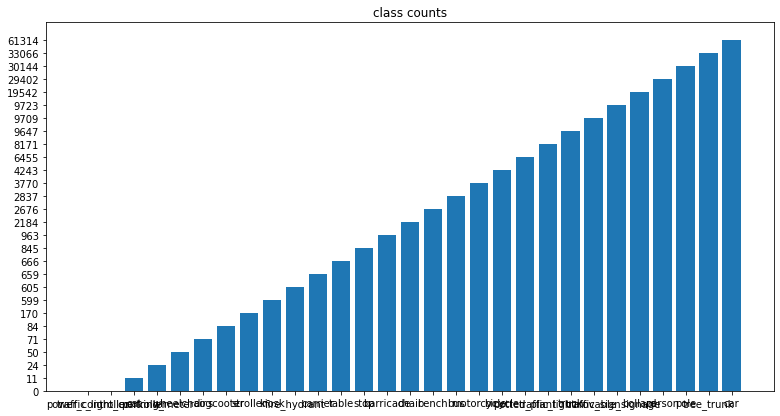

In [110]:
def plot_bar_graph(X, y, label='default'):
    fig = plt.figure(figsize=(60,80))
    axis = fig.add_subplot(10, 4, 1)
    axis.bar(X, y, label=label)
    axis.set_xticks(X)
    axis.set_xticklabels(X)
    axis.set_title(label)

plot_bar_graph(class_counts[:, 0], class_counts[:, 1], label='class counts')

In [29]:
names = pd.unique(dfy['class'])
print("\tclass\tzero-object-ratio\t0-in-0f-ratio\tnon-0f-ratio")
for name in names:
    dfys = dfy[dfy['class'] == name]

    # dfyw = dfy[dfy['class'] == name]

    total = len(dfys)
    total_zeros = len(dfys[dfys['visibility'] == '0'])
    # total objects in zero folder - there could more 1 or 2 visibility objects too
    zero_f_total = len(dfys[dfys['folder'] == '0'])

    df_fzeros = dfys[dfys['folder'] == '0']
    # pure zero visibility objects in zero folder
    zeros_in_zero_f = len(df_fzeros[df_fzeros['visibility'] == '0'])
    # print("{}\t{} ({}/{})\t{} ({}/{})\t{} ({}/{})".format(
    #     name, round(total_zeros/total, 2), total_zeros, total,
    #         round(zeros_in_zero_f/zero_f_total, 2) if zero_f_total != 0 else 0, zeros_in_zero_f, zero_f_total,
    #         round((total_zeros - zeros_in_zero_f)/total_zeros, 2), total_zeros - zeros_in_zero_f, total_zeros))

    if total_zeros != 0:
        print("{},{},{},{},{},{},{},{},{},{}".format(
            name, round(total_zeros/total, 2), total_zeros, total,
                round(zeros_in_zero_f/zero_f_total, 2) if zero_f_total != 0 else 0, zeros_in_zero_f, zero_f_total,
                round((total_zeros - zeros_in_zero_f)/total_zeros, 2), total_zeros - zeros_in_zero_f, total_zeros))
    else:
        print("{},{},{},{},{},{},{},{},{},{}".format(
            name, round(total_zeros/total, 2), total_zeros, total,
                round(zeros_in_zero_f/zero_f_total, 2) if zero_f_total != 0 else 0, zeros_in_zero_f, zero_f_total,
                total_zeros, total_zeros, total_zeros))



	class	zero-object-ratio	0-in-0f-ratio	non-0f-ratio
warning@Parking,0.44,385,881,0.56,131,236,0.66,254,385
warning@Engine,0.47,393,842,0.6,133,220,0.66,260,393
warning@Brake,0.4,371,934,0.51,122,241,0.67,249,371
warning@ABS,0.36,209,575,0.5,72,143,0.66,137,209
alert@Parking,0.21,137,656,0.29,32,111,0.77,105,137
alert@Coolant,0.26,164,638,0.41,38,92,0.77,126,164
alert@Brake,0.28,170,614,0.23,21,90,0.88,149,170
warning@Fuel,0.47,228,483,0.67,37,55,0.84,191,228
warning@Tire,0.42,217,520,0.61,47,77,0.78,170,217
alert@Distance,0.53,291,552,0.68,34,50,0.88,257,291
warning@StabilityOn,0.44,241,550,0.77,56,73,0.77,185,241
warning@StabilityOff,0.3,151,498,0.58,42,72,0.72,109,151
alert@Steering,0.42,223,528,0.56,23,41,0.9,200,223
alert@Retaining,0.36,160,443,0.6,18,30,0.89,142,160
alert@Seatbelt,0.34,163,481,0.43,16,37,0.9,147,163


In [111]:
DATA_ROOT

'D:\\Sidewalk\\Sidewalk_19009_output_zip\\Sidewalk_19009_output_zip_box\\Sidewalk_19009_output_zip_box_000001_1\\'

In [125]:
path = DATA_ROOT + 'train\\Bbox_0001\\'

import cv2

IMAGE_SIZE = 320

def load_images(path, file_type="*"):
    files = glob_files(path, file_type)

    images = []
    for file in files:
        print(file)
        image = cv2.imread(file)
        if image is not None:
            # image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            # normalize
            # image = image / 255
            images.append(image)
        else:
            print(file, ' is not an image file')

    return np.array(images)

def plot_images(X, idx=None, limit=20):
  fig = plt.figure(figsize=(20,20))

  # The number of images for plotting is limited to 50
  end_id = len(X) if len(X) < limit else limit
  if idx is None:
    idx = range(0, end_id)

  i = 0
  for id in idx:
    axis = fig.add_subplot(5, 4, i+1)
    plt.axis('off')
    image = X[id]
    plt.imshow(image)
    i += 1


In [126]:
path

'D:\\Sidewalk\\Sidewalk_19009_output_zip\\Sidewalk_19009_output_zip_box\\Sidewalk_19009_output_zip_box_000001_1\\train\\Bbox_0001\\'

In [ ]:
y_01, dfyy_01 = load_labels(path, file_type='*.xml')
y_01[0][0]

In [ ]:
y_01

In [140]:
def load_Xy(path, file_type='*'):
    files = glob_files(path, file_type=file_type)
    print(files)

    y = []

    X = []

    for file in files:
        labels = parse_xml(file)
        # y.append([os.path.basename(file), labels])
        for label in labels:
            filename = label[0]
            # print(filename)

            image_filename = os.path.join(path, filename)
            # print(image_filename)
            X.append(cv2.imread(image_filename))

            width = label[1]
            height = label[2]
            boxes = label[3]

            y.append([filename, width, height, boxes])
    return np.array(X), np.array(y)

In [ ]:
# images = load_images(path)
X, y = load_Xy(path, file_type='*.xml')
X.shape

In [ ]:
a = [1, 2, 3]

In [164]:
import matplotlib.patches as patches

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def create_patch_rectangle(y, color=COLORS[2]):
  # print(y)
  width = int(y[2] - y[0])
  height = int(y[3] - y[1])
  return patches.Rectangle((y[0], y[1]),
                           width, height,
                           edgecolor=color, fill=False)

def plot_image(image, boxes, axis):
  for box in boxes:
    # class_id = int(box[0])
    rect = create_patch_rectangle(box)
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images_with_boxes(X, y, idx=None, limit=20):
  fig = plt.figure(figsize=(50, 50))

  # The number of images for plotting is limited to 50
  end_id = len(X) if len(X) < limit else limit
  if idx is None:
    idx = range(0, end_id)

  i = 0
  for id in idx:
    # print(y[id][3][:, 1:5])
    boxes = y[id][3][:, 1:5]
    npboxes = []
    for a in boxes:
      npboxes.append([int(float(i)) for i in a])

    boxes = np.array(npboxes)
    # print(npboxes)
    # break
    axis = fig.add_subplot(5, 5, i+1)
    # plt.axis('off')
    # image = X[id]
    # plt.imshow(image)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], boxes, axis)
    i += 1

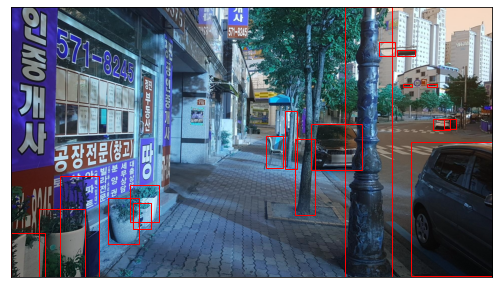

In [165]:
# images = load_images(path)
# X, y = load_Xy(DATA_ROOT + "..\\Benz\\", file_type='Benz_day_2_1*.xml')
# X, y = load_Xy(DATA_ROOT, file_type='BMW_day_0_1*.xml')

plot_images_with_boxes(X, y, idx=[1], limit=2)